<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Модель" data-toc-modified-id="Модель-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Модель</a></span></li></ul></div>

# Восстановление золота из руды

В рамках проекта небходимо подготовить прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Наименование признаков в датасетах происходит по следующему принципу:
[этап].[тип_параметра].[название_параметра]

Пример: rougher.input.feed_ag

Возможные значения для блока [этап]:
- rougher — флотация
- primary_cleaner — первичная очистка
- secondary_cleaner — вторичная очистка
- final — финальные характеристики

Возможные значения для блока [тип_параметра]:
- input — параметры сырья
- output — параметры продукта
- state — параметры, характеризующие текущее состояние этапа
- calculation — расчётные характеристики

## Подготовка данных

In [ ]:
import pandas as pd
import os
import matplotlib.pyplot as plt 
import numpy as np
from tqdm import tqdm

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.dummy import DummyRegressor

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score

In [ ]:
path1_1 = '/datasets/gold_recovery_train_new.csv'
path1_2 = '/datasets/gold_recovery_test_new.csv'
path1_3 = '/datasets/gold_recovery_full_new.csv'


path2_1 = 'gold_recovery_train_new.csv'
path2_2 = 'gold_recovery_test_new.csv'
path2_3 = 'gold_recovery_full_new.csv'

if os.path.exists(path1_1 and path1_2 and path1_3):
    gold_train = pd.read_csv(path1_1)
    gold_test = pd.read_csv(path1_2)
    gold_full = pd.read_csv(path1_3)
elif os.path.exists(path2_1 and path2_2 and path2_3):
    gold_train = pd.read_csv(path2_1)
    gold_test = pd.read_csv(path2_2)
    gold_full = pd.read_csv(path2_3)
else:
    print('Something is wrong')
    


In [ ]:
print("Обучение")
display(gold_train.head(10))
display(gold_train.info())
display(gold_train.describe())

print("Тест")
display(gold_test.head(10))
display(gold_test.info())
display(gold_test.describe())

print("Исходные данные")
display(gold_full.head(10))
display(gold_full.info())
display(gold_full.describe())

Обучение


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
5,2016-01-15 05:00:00,6.482968,10.049416,5.480257,41.633678,69.465816,10.182708,0.664118,16.999638,1.918586,...,13.938497,-500.970168,11.883350,-500.395298,10.054147,-496.374715,7.965083,-499.364752,14.017067,-599.707915
6,2016-01-15 06:00:00,6.533849,10.058141,4.569100,41.995316,69.300835,10.304598,0.807342,16.723575,2.058913,...,14.046819,-500.971133,12.091543,-500.501426,10.003247,-497.083180,8.010890,-500.002423,14.029649,-600.905470
7,2016-01-15 07:00:00,6.130823,9.935481,4.389813,42.452727,70.230976,10.443288,0.949346,16.689959,2.143437,...,13.974691,-501.819696,12.101324,-500.583446,9.873169,-499.171928,7.993381,-499.794518,13.984498,-600.411070
8,2016-01-15 08:00:00,5.834140,10.071156,4.876389,43.404078,69.688595,10.420140,1.065453,17.201948,2.209881,...,13.964030,-504.252450,12.060738,-501.174549,10.033838,-501.178133,7.881604,-499.729434,13.967135,-599.061188
9,2016-01-15 09:00:00,5.687063,9.980404,5.282514,43.235220,70.279619,10.487013,1.159805,17.483979,2.209593,...,13.989632,-503.195299,12.052233,-500.928547,9.962574,-502.986357,7.979219,-500.146835,13.981614,-598.070855


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14149 entries, 0 to 14148
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                14149 non-null  object 
 1   final.output.concentrate_ag                         14148 non-null  float64
 2   final.output.concentrate_pb                         14148 non-null  float64
 3   final.output.concentrate_sol                        13938 non-null  float64
 4   final.output.concentrate_au                         14149 non-null  float64
 5   final.output.recovery                               14149 non-null  float64
 6   final.output.tail_ag                                14149 non-null  float64
 7   final.output.tail_pb                                14049 non-null  float64
 8   final.output.tail_sol                               14144 non-null  float64


None

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,14148.000000,14148.000000,13938.000000,14149.000000,14149.000000,14149.000000,14049.000000,14144.000000,14149.000000,14129.000000,...,14143.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14148.000000,14147.000000,14148.000000
mean,5.142034,10.132960,9.202849,44.003792,66.518832,9.607035,2.597298,10.512122,2.918421,133.320659,...,19.985454,-478.696836,15.487065,-460.229416,16.775136,-483.956022,13.064590,-483.966564,19.577539,-506.798480
std,1.369586,1.654930,2.790516,4.905261,10.295402,2.319069,0.971843,3.003617,0.903712,39.431659,...,5.657723,50.736021,5.255655,58.843586,5.831906,37.892788,5.765617,39.207913,5.764417,37.079249
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003112,...,0.000000,-799.709069,0.000000,-799.889113,-0.372054,-797.142475,0.646208,-800.006180,0.195324,-809.398668
25%,4.211620,9.297355,7.484645,43.276111,62.545817,7.997429,1.905973,8.811324,2.368607,107.006651,...,14.990775,-500.628656,11.894558,-500.149000,11.083980,-500.363177,8.994405,-500.105994,14.989304,-500.745104
50%,4.994652,10.297144,8.845462,44.872436,67.432775,9.480270,2.592022,10.514621,2.851025,133.018328,...,20.001789,-499.681450,14.975536,-499.388738,17.932223,-499.702452,11.997547,-499.914556,19.984175,-500.061431
75%,5.859540,11.170603,10.487508,46.166425,72.346428,11.003707,3.241723,11.933009,3.434764,159.825396,...,24.990826,-477.472413,20.059375,-400.039008,21.346550,-487.712108,17.982903,-453.186936,24.991623,-499.536466
max,16.001945,17.031899,18.124851,52.756638,100.000000,19.552149,5.639565,22.317730,8.197408,250.127834,...,30.115735,-245.239184,24.007913,-145.071088,43.709931,-275.073125,27.926001,-157.396071,32.188906,-104.427459


Тест


,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,12.033091,-498.350935,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,12.025367,-500.786497,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333
5,2016-09-01 05:59:59,168.485085,8.817007,7.420000,0.791191,1402.826803,-499.299521,1401.511119,-499.205357,1404.088107,...,12.029797,-499.814895,8.036586,-500.371492,8.041446,-510.037054,4.983949,-499.990990,24.978973,-500.475640
6,2016-09-01 06:59:59,144.133440,7.924610,7.420000,0.788838,1398.252401,-499.748672,1393.255503,-499.195380,1396.738566,...,12.026296,-499.473127,8.027984,-500.983079,7.907340,-507.964971,5.010224,-500.043697,25.040709,-499.501984
7,2016-09-01 07:59:59,133.513396,8.055252,6.988000,0.801871,1401.669677,-501.777839,1400.754446,-502.514024,1400.465244,...,12.040911,-501.293852,8.020490,-499.185229,8.116897,-511.927561,5.036498,-500.149615,25.032580,-503.970657
8,2016-09-01 08:59:59,133.735356,7.999618,6.935000,0.789329,1402.358981,-499.981597,1400.985954,-496.802968,1401.168584,...,11.998184,-499.481608,8.012610,-500.896783,7.974422,-521.199104,5.061599,-499.791519,25.005063,-497.613716
9,2016-09-01 09:59:59,126.961069,8.017856,7.030000,0.805298,1400.816120,-499.014158,1399.975401,-499.570552,1401.871924,...,12.040725,-499.987743,7.989503,-499.750625,7.989710,-509.946737,5.068811,-499.293900,24.992741,-499.272255


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   date                                        5290 non-null   object 
 1   primary_cleaner.input.sulfate               5286 non-null   float64
 2   primary_cleaner.input.depressant            5285 non-null   float64
 3   primary_cleaner.input.feed_size             5290 non-null   float64
 4   primary_cleaner.input.xanthate              5286 non-null   float64
 5   primary_cleaner.state.floatbank8_a_air      5290 non-null   float64
 6   primary_cleaner.state.floatbank8_a_level    5290 non-null   float64
 7   primary_cleaner.state.floatbank8_b_air      5290 non-null   float64
 8   primary_cleaner.state.floatbank8_b_level    5290 non-null   float64
 9   primary_cleaner.state.floatbank8_c_air      5290 non-null   float64
 10  primary_clea

None

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,5286.000000,5285.000000,5290.000000,5286.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5.290000e+03,5290.000000,...,5.290000e+03,5290.000000,5.290000e+03,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000,5290.000000
mean,174.839652,8.683596,7.266339,1.383803,1.539494e+03,-497.665883,1.545174e+03,-500.273098,1.527272e+03,-498.330680,...,1.632007e+01,-505.144570,1.373544e+01,-463.349858,12.804186,-501.329122,9.881145,-495.663398,17.304935,-501.793193
std,43.027080,3.072050,0.610219,0.643474,1.167979e+02,19.952431,1.222246e+02,32.968307,1.225380e+02,21.964876,...,3.493583e+00,31.427337,3.430484e+00,86.189107,3.026591,17.951495,2.868205,34.535007,4.536544,39.044215
min,2.566156,0.003839,5.650000,0.004984,5.445860e-32,-795.316337,6.647490e-32,-799.997015,4.033736e-32,-799.960571,...,1.079872e-16,-799.798523,2.489718e-17,-800.836914,0.069227,-797.323986,0.528083,-800.220337,-0.079426,-809.741464
25%,147.121401,6.489555,6.890000,0.907623,1.498936e+03,-500.357298,1.498971e+03,-500.703002,1.473230e+03,-501.018117,...,1.403618e+01,-500.868258,1.202862e+01,-500.323028,10.914838,-500.726841,8.036719,-500.194668,13.997317,-500.690984
50%,177.828489,8.052207,7.250000,1.197610,1.585129e+03,-499.969164,1.595622e+03,-500.028514,1.549595e+03,-500.017711,...,1.700847e+01,-500.115727,1.496486e+01,-499.576513,12.954182,-499.990332,10.004301,-499.990535,16.014935,-500.007126
75%,208.125438,10.027764,7.600000,1.797819,1.602077e+03,-499.568951,1.602324e+03,-499.293257,1.601144e+03,-498.994130,...,1.803862e+01,-499.404224,1.596213e+01,-400.933805,15.097528,-499.283191,11.997467,-499.719913,21.020013,-499.373018
max,265.983123,40.000000,15.500000,4.102454,2.103104e+03,-57.195404,1.813084e+03,-142.527229,1.715054e+03,-150.937035,...,3.005180e+01,-401.565212,3.126971e+01,-6.506986,25.258848,-244.483566,14.086866,-137.740004,26.705889,-123.307487


Исходные данные


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363
3,2016-01-15 03:00:00,6.047977,9.977019,4.858634,42.689819,68.347543,10.422762,0.883763,16.532835,2.146849,...,14.036510,-500.857308,11.999550,-501.193686,9.970366,-499.201640,7.977324,-500.255908,14.005551,-599.996129
4,2016-01-15 04:00:00,6.148599,10.142511,4.939416,42.774141,66.927016,10.360302,0.792826,16.525686,2.055292,...,14.027298,-499.838632,11.953070,-501.053894,9.925709,-501.686727,7.894242,-500.356035,13.996647,-601.496691
5,2016-01-15 05:00:00,6.482968,10.049416,5.480257,41.633678,69.465816,10.182708,0.664118,16.999638,1.918586,...,13.938497,-500.970168,11.883350,-500.395298,10.054147,-496.374715,7.965083,-499.364752,14.017067,-599.707915
6,2016-01-15 06:00:00,6.533849,10.058141,4.569100,41.995316,69.300835,10.304598,0.807342,16.723575,2.058913,...,14.046819,-500.971133,12.091543,-500.501426,10.003247,-497.083180,8.010890,-500.002423,14.029649,-600.905470
7,2016-01-15 07:00:00,6.130823,9.935481,4.389813,42.452727,70.230976,10.443288,0.949346,16.689959,2.143437,...,13.974691,-501.819696,12.101324,-500.583446,9.873169,-499.171928,7.993381,-499.794518,13.984498,-600.411070
8,2016-01-15 08:00:00,5.834140,10.071156,4.876389,43.404078,69.688595,10.420140,1.065453,17.201948,2.209881,...,13.964030,-504.252450,12.060738,-501.174549,10.033838,-501.178133,7.881604,-499.729434,13.967135,-599.061188
9,2016-01-15 09:00:00,5.687063,9.980404,5.282514,43.235220,70.279619,10.487013,1.159805,17.483979,2.209593,...,13.989632,-503.195299,12.052233,-500.928547,9.962574,-502.986357,7.979219,-500.146835,13.981614,-598.070855


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   date                                                19439 non-null  object 
 1   final.output.concentrate_ag                         19438 non-null  float64
 2   final.output.concentrate_pb                         19438 non-null  float64
 3   final.output.concentrate_sol                        19228 non-null  float64
 4   final.output.concentrate_au                         19439 non-null  float64
 5   final.output.recovery                               19439 non-null  float64
 6   final.output.tail_ag                                19438 non-null  float64
 7   final.output.tail_pb                                19338 non-null  float64
 8   final.output.tail_sol                               19433 non-null  float64


None

,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,primary_cleaner.input.sulfate,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
count,19438.000000,19438.000000,19228.000000,19439.000000,19439.000000,19438.000000,19338.000000,19433.000000,19439.000000,19415.000000,...,19433.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19438.000000,19437.000000,19438.000000
mean,5.168470,9.978895,9.501224,44.076513,67.050208,9.688589,2.705795,10.583728,3.042467,144.624774,...,18.987674,-485.894516,15.010366,-461.078636,15.694452,-488.684065,12.198224,-487.149827,18.959024,-505.436305
std,1.372348,1.669240,2.787537,5.129784,10.125840,2.328642,0.949077,2.868782,0.922808,44.464071,...,5.411058,47.758570,4.890228,67.405524,5.510974,34.533396,5.333024,38.347312,5.550498,37.689057
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003112,...,0.000000,-799.798523,0.000000,-800.836914,-0.372054,-797.323986,0.528083,-800.220337,-0.079426,-809.741464
25%,4.251240,9.137262,7.722820,43.402215,63.299712,8.062878,2.040119,8.938947,2.461138,114.107029,...,14.975734,-500.704892,11.940294,-500.187742,10.988606,-500.458467,8.971105,-500.129462,14.983037,-500.728067
50%,5.066094,10.102433,9.218961,45.011244,68.172738,9.743623,2.748730,10.622456,2.984909,143.232103,...,18.017481,-499.837793,14.971014,-499.459786,15.000036,-499.802605,11.019433,-499.935317,19.960541,-500.048400
75%,5.895527,11.035769,10.947813,46.275313,72.686642,11.134294,3.333216,12.104271,3.571351,175.075656,...,23.012470,-498.249730,19.034162,-400.118106,18.026190,-498.384187,14.019088,-499.436708,24.003170,-499.495378
max,16.001945,17.031899,19.615720,52.756638,100.000000,19.552149,5.804178,22.317730,8.245022,265.983123,...,30.115735,-245.239184,31.269706,-6.506986,43.709931,-244.483566,27.926001,-137.740004,32.188906,-104.427459


**Общий взгляд на данные:**

- наличие пропусков почти в каждом столбце
- в датасете тестовой выборки действительно не хватает многих данных
- в полной выборке судя по кол-ву строки просто тестовая+обучающая выборка, каких-то новых данных там нет
- отметила для себя, что судя по показателям среднего, медианы и стандартного отклонения - почти все данные лежат около среднего значения, судя по std - сильных отклонений нет (на глаз оценила что отклонение у всех столбцов не больше трети среднего)
- все данные кроме даты отноятся к типу float, то есть при предобработке не потребуется искать в чем проблема и изменять тип данных

Посчитаем самостоятельно recovery, сравним с тем, что уже посчитан на полном датасете. Вычислим MAE и проанализируем результат.

In [ ]:
#сохраним нужные для расчетов колонки в отдельной таблице
recovery_df = gold_full[['rougher.output.recovery','rougher.output.concentrate_au','rougher.input.feed_au','rougher.output.tail_au']]    

#удалим дубликаты
recovery_df = recovery_df.dropna()

#расчет recovery
recovery_df['rougher.output.recovery_calc'] = ((recovery_df['rougher.output.concentrate_au'] * (
    recovery_df['rougher.input.feed_au'] - recovery_df['rougher.output.tail_au'])) / (
    recovery_df['rougher.input.feed_au'] * (
        recovery_df['rougher.output.concentrate_au'] - recovery_df['rougher.output.tail_au']))) * 100

#расчет MAE
mean_absolute_error(recovery_df['rougher.output.recovery_calc'], recovery_df['rougher.output.recovery'])

9.874045668302637e-15

**Рассмотрим признаки, недоступные в тестовой выборке.**

Это столбцы относящиеся к финальной стадии (начинаются на final), а также rougher.output. Я так понимаю, в тестовой выборке мы как раз и имеем данные необходимые для обучения.

То есть, насколько я понимаю, в рамках обучения модели мы можем выбросить из полного датасета те столбцы, которые отсутсвуют в тестовой выборке по сравнению с обучающей - со стадией final т.к. это наши целевые данные. 

In [ ]:
dif_test = gold_train.drop(gold_test.columns, axis=1).columns
display('Столбцы, отсутствующие в gold_test по сравнению с gold_train', dif_test)

'Столбцы, отсутствующие в gold_test по сравнению с gold_train'

Index(['final.output.concentrate_ag', 'final.output.concentrate_pb',
       'final.output.concentrate_sol', 'final.output.concentrate_au',
       'final.output.recovery', 'final.output.tail_ag', 'final.output.tail_pb',
       'final.output.tail_sol', 'final.output.tail_au',
       'primary_cleaner.output.concentrate_ag',
       'primary_cleaner.output.concentrate_pb',
       'primary_cleaner.output.concentrate_sol',
       'primary_cleaner.output.concentrate_au',
       'primary_cleaner.output.tail_ag', 'primary_cleaner.output.tail_pb',
       'primary_cleaner.output.tail_sol', 'primary_cleaner.output.tail_au',
       'rougher.calculation.sulfate_to_au_concentrate',
       'rougher.calculation.floatbank10_sulfate_to_au_feed',
       'rougher.calculation.floatbank11_sulfate_to_au_feed',
       'rougher.calculation.au_pb_ratio', 'rougher.output.concentrate_ag',
       'rougher.output.concentrate_pb', 'rougher.output.concentrate_sol',
       'rougher.output.concentrate_au', 'rougher.outpu

**Предобработка данных**

В данных присутсвуют пропуски. В задаче есть условие,что соседние данные похожи, поэтому используем метод ffill для заполнения пропусков

In [ ]:
gold_test = gold_test.ffill()
gold_train = gold_train.ffill()
gold_full = gold_full.ffill()

print(gold_test.isna().sum())
print(gold_train.isna().sum())
print(gold_full.isna().sum())


date                                          0
primary_cleaner.input.sulfate                 0
primary_cleaner.input.depressant              0
primary_cleaner.input.feed_size               0
primary_cleaner.input.xanthate                0
primary_cleaner.state.floatbank8_a_air        0
primary_cleaner.state.floatbank8_a_level      0
primary_cleaner.state.floatbank8_b_air        0
primary_cleaner.state.floatbank8_b_level      0
primary_cleaner.state.floatbank8_c_air        0
primary_cleaner.state.floatbank8_c_level      0
primary_cleaner.state.floatbank8_d_air        0
primary_cleaner.state.floatbank8_d_level      0
rougher.input.feed_ag                         0
rougher.input.feed_pb                         0
rougher.input.feed_rate                       0
rougher.input.feed_size                       0
rougher.input.feed_sol                        0
rougher.input.feed_au                         0
rougher.input.floatbank10_sulfate             0
rougher.input.floatbank10_xanthate      

Далее выявим полные дубликаты.

In [ ]:
print("Кол-во дубликатов полного датасета:",gold_full.duplicated().sum())
print("Кол-во дубликатов обучающего датасета:",gold_train.duplicated().sum())
print("Кол-во дубликатов тестового датасета:",gold_test.duplicated().sum())

Кол-во дубликатов полного датасета: 0
Кол-во дубликатов обучающего датасета: 0
Кол-во дубликатов тестового датасета: 0


Удаляем значения 0 в столбцах т.к. такие данные считаются аномальными, а еще они поломают подсчет smape в моделях

In [ ]:
#функция для фильтрации нулей
def kill_zero(df):
    df_col = list(df.columns)
    for column in df_col:
        df = df[df[column]!=0]
    return df

gold_test = kill_zero(gold_test)
gold_train = kill_zero(gold_train)
gold_full = kill_zero(gold_full)

print('Длина gold_test после удаления нулей:',len(gold_test))
print('Длина gold_train после удаления нулей:',len(gold_train))
print('Длина gold_full после удаления нулей:',len(gold_full))


Длина gold_test после удаления нулей: 5282
Длина gold_train после удаления нулей: 12831
Длина gold_full после удаления нулей: 17779


## Анализ данных

**Концентрация металлов**

Рассмотрим изменения концентрации металлов на различных этапах очистки. Найдем среднее по каждому столбцу концентрата и построим график

In [ ]:
#создадит таблицы, где в каждой собраны колонки с концентратами металлов. Колонки соберем в порядке этапов производства
conc_ag = gold_full[['rougher.input.feed_ag','rougher.output.concentrate_ag','primary_cleaner.output.concentrate_ag','final.output.concentrate_ag']]
conc_pb = gold_full[['rougher.input.feed_pb','rougher.output.concentrate_pb','primary_cleaner.output.concentrate_pb','final.output.concentrate_pb']]
conc_sol = gold_full[['rougher.input.feed_sol','rougher.output.concentrate_sol','primary_cleaner.output.concentrate_sol','final.output.concentrate_sol']]
conc_au = gold_full[['rougher.input.feed_au','rougher.output.concentrate_au','primary_cleaner.output.concentrate_au','final.output.concentrate_au']]

#функция для создания списка со средними всех колонок таблицы
def col_mean(df):
    df_col = df.columns
    mean_list = []
    for column in df_col:
        mean_list.append(df[column].mean())
    return mean_list

#применим функцию для создания списков средних по концентрату каждого металла
conc_ag_mean = col_mean(conc_ag)
conc_pb_mean = col_mean(conc_pb)
conc_sol_mean = col_mean(conc_sol) 
conc_au_mean = col_mean(conc_au)   

conc_ag_mean = pd.Series(conc_ag_mean)
conc_pb_mean = pd.Series(conc_pb_mean)
conc_sol_mean = pd.Series(conc_sol_mean)
conc_au_mean = pd.Series(conc_au_mean)

Text(0.5, 1.0, 'Концентрация металлов по этапам производства')

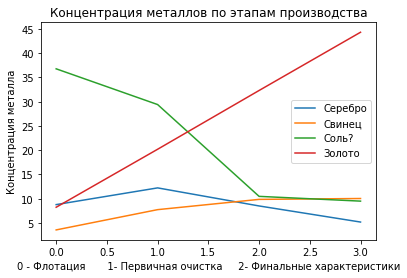

In [ ]:
#построим графики

plt_ag = conc_ag_mean.plot(label='Серебро',legend=True)
plt_pb = conc_pb_mean.plot(label='Свинец',legend=True)
plt_sol = conc_sol_mean.plot(label ='Соль?',legend=True)
plt_au = conc_au_mean.plot(label='Золото',legend=True)
plt_ag.set_xlabel('0 - Флотация       1- Первичная очистка     2- Финальные характеристики')
plt_ag.set_ylabel('Концентрация металла')
plt_ag.set_title('Концентрация металлов по этапам производства')

Итак, на построенном графике видно, что с каждым этапом очистки содержание свинца и золота повышается, наибольший прирост показывает содержание золота. Иная ситуация с веществами Серебро и Sol (? я не уверенна что это за элемент), где наоборот каждый этап очистки снижает их концентрацию.

**Распределение гранул сырья**

Сравним распределения размеров гранул сырья на обучающей и тестовой выборках. Если распределения сильно отличаются друг от друга, оценка модели будет неправильной.

Если я правильно понимаю, речь идет об столбцах feed_size. Как и в прошлом случае, создадим таблицу, посчитаем среднее и выведем график.

In [ ]:
#создалим таблицы с размером гранул сырья в обучающей и тестовой выборках
feed_size_train = gold_train[['rougher.input.feed_size','primary_cleaner.input.feed_size']]
feed_size_test = gold_test[['rougher.input.feed_size','primary_cleaner.input.feed_size']]

Рассмотрим распределение размера сырья двух выборок на этапе флотации

Медиана размера гранул сырья обучающей выборки 55.234403949644864
Медиана размера гранул сырья тестовой выборки 50.80010463110323


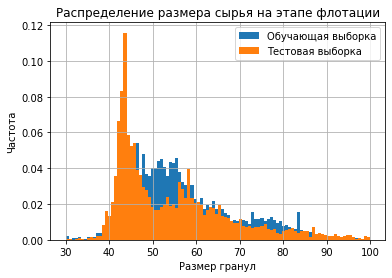

In [ ]:
#график обучающей выборки по размеру сырья
plt_1 = feed_size_train['rougher.input.feed_size'].plot(
    kind='hist',
    range=(30,100),
    bins=100, 
    grid = True, 
    label = 'Обучающая выборка',
    legend=True,
    density=True)

#график тестовой выборки по размеру сырья
plt_2 = feed_size_test['rougher.input.feed_size'].plot(
    kind='hist',
    range=(30,100),
    bins=100,
    grid = True, 
    label = 'Тестовая выборка',
    legend=True,
    density=True)

plt_1.set_xlabel('Размер гранул')
plt_1.set_ylabel('Частота')
plt_1.set_title('Распределение размера сырья на этапе флотации')

print('Медиана размера гранул сырья обучающей выборки',feed_size_train['rougher.input.feed_size'].median())
print('Медиана размера гранул сырья тестовой выборки',feed_size_test['rougher.input.feed_size'].median())

Рендж значений я задала исходя из концентрации данных, так, чтобы было видно распределение значений.

В целом, распределения выглядят схожими - большинство значений лежат в диапазоне от 40 до 60. Кроме того, видно, что размеры гранул в обучающей выборке распределены более равномерно, чем у тестовой - в диапазоне размеров от 43 до 45 сконцентрировано большое количество данных. Полагаю, в модели придется задавать балансировку.

Text(0.5, 1.0, 'Распределение размера сырья на этапе первичной очистки')

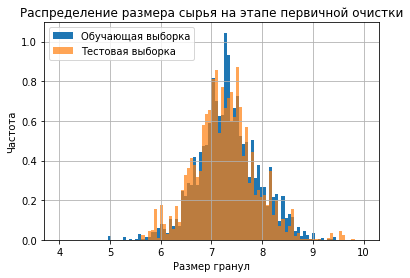

In [ ]:
#график обучающей выборки по распределению размера сырья на первичной очистке
plt_3 = feed_size_train['primary_cleaner.input.feed_size'].plot(
    kind='hist', 
    bins=100, 
    range=(4, 10),
    grid = True, 
    label = 'Обучающая выборка',
    legend=True,
    density=True)

#график тестовой выборки по распределению размера сырья на первичной очистке
plt_4 = feed_size_test['primary_cleaner.input.feed_size'].plot(
    kind='hist', 
    bins=100,
    range=(4, 10), 
    grid = True, 
    label = 'Тестовая выборка',
    legend=True,
    density=True,
    alpha = 0.7)
plt_3.set_xlabel('Размер гранул')
plt_3.set_ylabel('Частота')
plt_3.set_title('Распределение размера сырья на этапе первичной очистки')

Рендж значений я задала исходя из концентрации данных, так, чтобы было видно распределение значений.

Общий размер гранул значительно уменьшился после этапа флотации. 

Распределение обеих выборок нормальное, выборки выглядят идентичными по распределению данных.

**Концентрация веществ**

Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах. 


Text(0.5, 1.0, 'Суммарная концентрация всех веществ по трем стадиям')

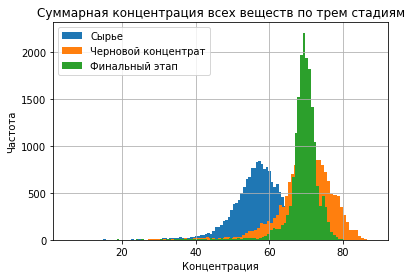

In [ ]:
#выделим нужные столбцы концентратов для каждоого этапа

#концентраты веществ в сырье
conc_inp_feed = gold_full[
    ['rougher.input.feed_ag',
     'rougher.input.feed_pb',
     'rougher.input.feed_sol',
     'rougher.input.feed_au']]

#концентраты веществ в черновом концентрате
conc_out_feed = gold_full[
    ['rougher.output.concentrate_ag',
     'rougher.output.concentrate_pb',
     'rougher.output.concentrate_sol',
     'rougher.output.concentrate_au']]

#концентраты веществ на финальном этапе
conc_final = gold_full[
    ['final.output.concentrate_ag',
     'final.output.concentrate_pb',
     'final.output.concentrate_sol',
     'final.output.concentrate_au']]

#функция для суммирования веществ по всем этапам
def sum_col(df):
    df_col = df.columns
    df_sum_col = df[df.columns[0]] + df[df.columns[1]] + df[df.columns[2]] + df[df.columns[3]]
    return df_sum_col

#вывод гистограмм
conc_inp_feed_hist = sum_col(conc_inp_feed).plot(
    kind='hist', 
    bins=100, 
    grid = True, 
    label = 'Сырье',
    legend=True)

conc_out_feed_hist = sum_col(conc_out_feed).plot(
    kind='hist', 
    bins=100, 
    grid = True, 
    label = 'Черновой концентрат',
    legend=True)

conc_final_hist = sum_col(conc_final).plot(
    kind='hist', 
    bins=100, 
    grid = True, 
    label = 'Финальный этап',
    legend=True)

conc_inp_feed_hist.set_xlabel('Концентрация')
conc_inp_feed_hist.set_ylabel('Частота')
conc_inp_feed_hist.set_title('Суммарная концентрация всех веществ по трем стадиям')


Мы видим, что с каждым этапом суммарная концентрация веществ растет, наибольших значений она достигает на финальном этапе. Аномальных значений не выявлено.

## Модель

**sMAPE**

Напишем функцию для вычисления итоговой sMAPE.

In [ ]:
def smape_calc(target, predict):
    smape = np.mean(abs(target-predict) / ((abs(target) + abs(predict)) / 2)) * 100
    return smape

def final_smape_calc(smape_rougher, smape_final):
    return (0.25 * smape_rougher + 0.75 * smape_final)

**Обучение моделей**

Обучим модель линейной регрессии и оценим их качество кросс-валидацией. Выберем лучшую модель и проверим её на тестовой выборке.

In [ ]:
#обучающий набор данных
ft_train = gold_train.drop(dif_test,axis=1).drop(['date'],axis=1)

#таргет этапа флотации
tg_train_rougher = gold_train['rougher.output.recovery']

#таргет финального этапа
tg_train_final = gold_train['final.output.recovery']

In [ ]:
#проведем масштабирование методом стандартизации данных
scaler = StandardScaler()
columns = ft_train.columns
scaler.fit(ft_train[columns]) 
ft_train[columns] = scaler.transform(ft_train[columns])
pd.options.mode.chained_assignment = None


**Линейная регрессия**

SMAPE для этапа флотации

In [ ]:
scores_1_r = []

sample_size = int(len(gold_train)/3)

for i in range(0, len(gold_train), sample_size):
    valid_indexes_r = gold_train.iloc[i: i + sample_size].index
    train_indexes_r = (gold_train.loc[0:i] + gold_train.iloc[i + sample_size:]).index
    ft_train_df = pd.DataFrame(ft_train) #масштабирование данных выше возвращает нампай, переведем в формат df чтобы работало с loc
    features_valid = ft_train_df.loc[valid_indexes_r]
    target_valid_r = tg_train_rougher.loc[valid_indexes_r]
    features_train = ft_train_df.loc[train_indexes_r]
    target_train_r = tg_train_rougher.loc[train_indexes_r]

    model_1_r = LinearRegression()
    model_1_r.fit(X=features_train,y=target_train_r)
    predictions_valid = model_1_r.predict(features_valid) 
    score = smape_calc(target_valid_r, predictions_valid)
    
    scores_1_r.append(score)

import numpy
scores_1_r = numpy.array(scores_1_r)
scores_1_r_mean = scores_1_r.mean()

print('Средняя оценка smape модели линейной регрессии этапа флотации:', scores_1_r_mean)


Средняя оценка smape модели линейной регрессии этапа флотации: 10.613768412430296


SMAPE для финального этапа

In [ ]:
scores_1_f = []

sample_size = int(len(gold_train)/3)

for i in range(0, len(gold_train), sample_size):
    valid_indexes = gold_train.iloc[i: i + sample_size].index
    train_indexes = (gold_train.loc[0:i] + gold_train.iloc[i + sample_size:]).index
    features_valid = ft_train_df.loc[valid_indexes]
    target_valid_f = tg_train_final.loc[valid_indexes]
    features_train = ft_train_df.loc[train_indexes]
    target_train_f = tg_train_final.loc[train_indexes]

    model_1_f = LinearRegression()
    model_1_f.fit(X=features_train,y=target_train_f)
    predictions_valid = model_1_f.predict(features_valid) 
    score = smape_calc(target_valid_f, predictions_valid)
    
    scores_1_f.append(score)

import numpy
scores_1_f = numpy.array(scores_1_f)
scores_1_f_mean = scores_1_f.mean()

print('Средняя оценка smape модели линейной регрессии финального этапа:', scores_1_f_mean)


Средняя оценка smape модели линейной регрессии финального этапа: 13.329098625152104


In [ ]:
scores_1 = final_smape_calc(scores_1_r, scores_1_f).mean()
print('Общий SMAPE модели линейной регрессии:', scores_1)

Общий SMAPE модели линейной регрессии: 12.650266071971652


**Модель дерева решений**

SMAPE для этапа флотации

In [ ]:
ft_train = np.array(ft_train)
tg_train_rougher = np.array(tg_train_rougher)
tg_train_final = np.array(tg_train_final)

#задаем свою метрику 
smape_score = make_scorer(smape_calc, greater_is_better=False)

#param_grid
params_for_tree = {'max_depth': np.arange(1,10)}

#модель дерева решений
model_2_r = GridSearchCV(DecisionTreeRegressor(random_state = 0),param_grid = params_for_tree, scoring = make_scorer(smape_calc, greater_is_better=False), cv=5)

#обучение
model_2_r.fit(ft_train,tg_train_rougher)

#кросс-валидация и применение SMAPE
scores_2_r = cross_val_score(model_2_r, ft_train, tg_train_rougher, cv=5, scoring = make_scorer(smape_calc, greater_is_better=False))
scores_2_r_mean = scores_2_r.mean()

print('Средняя оценка smape модели дерева решений этапа флотации:', scores_2_r_mean)

Средняя оценка smape модели дерева решений этапа флотации: -7.384468861694991


SMAPE для финального этапа

In [ ]:
#модель дерева решений
model_2_f = GridSearchCV(DecisionTreeRegressor(random_state = 0),param_grid = params_for_tree, scoring = make_scorer(smape_calc, greater_is_better=False), cv=5)

#обучение
model_2_f.fit(ft_train,tg_train_final)

#кросс-валидация и применение SMAPE
scores_2_f = cross_val_score(model_2_f, ft_train, tg_train_final, cv=5, scoring = make_scorer(smape_calc, greater_is_better=False)).mean()
scores_2_f_mean = scores_2_f.mean()

print('Средняя оценка smape модели дерева решений финального этапа:', scores_2_f_mean)

Средняя оценка smape модели дерева решений финального этапа: -10.023108913127677


In [ ]:
scores_2 = final_smape_calc(scores_2_r_mean, scores_2_f_mean)
print('Общий SMAPE модели дерева решений:', scores_2)

Общий SMAPE модели дерева решений: -9.363448900269505


**Модель случайного леса**

SMAPE для этапа флотации

In [ ]:
#param_grid
params_for_forest = [{'max_depth': np.arange(3,7)}, {'n_estimators': np.arange(10,51,10)}]

#модель случайного леса
model_3_r = GridSearchCV(RandomForestRegressor(random_state = 0),param_grid = params_for_forest, scoring = make_scorer(smape_calc, greater_is_better=False), cv=5)

#обучение
model_3_r.fit(ft_train,tg_train_rougher)

#кросс-валидация и применение SMAPE
scores_3_r = cross_val_score(model_3_r, ft_train, tg_train_rougher, cv=5, scoring = make_scorer(smape_calc, greater_is_better=False))
scores_3_r_mean = scores_3_r.mean()

print('Средняя оценка smape модели случайного леса финального этапа:', scores_3_r_mean)

SMAPE для финального этапа

In [ ]:
#модель случайного леса
model_3_f = GridSearchCV(RandomForestRegressor(random_state = 0),param_grid = params_for_forest, scoring = make_scorer(smape_calc, greater_is_better=False), cv=5)

#обучение
model_3_f.fit(ft_train,tg_train_final)

#кросс-валидация и применение SMAPE
scores_3_f = cross_val_score(model_3_f, ft_train, tg_train_final, cv=5, scoring = make_scorer(smape_calc, greater_is_better=False)).mean()
scores_3_f_mean = scores_3_f.mean()

print('Средняя оценка smape модели случайного леса этапа флотации:', scores_3_f_mean)

In [ ]:
scores_3 = final_smape_calc(scores_3_r_mean, scores_3_f_mean)
print('Общий SMAPE модели случайного леса:', scores_3)

**Найдем предсказания модели на тестовой выборке**

Все три модели показали высокие значения smape. Наименьшие значения по двум этапам и общее значение smape показала дерева решений. Проверим ее на тестовой выборке.

Для начала рассмотрим результаты на DummyRegressor.

In [ ]:
#зададим дамми-модели
model_test_r = DummyRegressor().fit(ft_train, tg_train_rougher)
model_test_f = DummyRegressor().fit(ft_train, tg_train_final)

#вычислим метрики smape
scores_4_r = cross_val_score(model_test_r, ft_train, tg_train_rougher, cv=5, scoring = make_scorer(smape_calc, greater_is_better=False))
scores_4_r_mean = scores_4_r.mean()
scores_4_f = cross_val_score(model_test_f, ft_train, tg_train_final, cv=5, scoring = make_scorer(smape_calc, greater_is_better=False)).mean()
scores_4_f_mean = scores_4_f.mean()
scores_4 = final_smape_calc(scores_4_r_mean, scores_4_f_mean)

print('Общий SMAPE модели:', scores_4)

Общий SMAPE модели: -9.6820074632652


Показатель SMAPE по дамми-модели почти такой же как и у лучшей из моделей. Полагаю, что это говорит о том, что выбранная модель неадекватна и не точна.

Протестируем выбранную модель.

In [ ]:
data_test = gold_test.merge(gold_full[['rougher.output.recovery','final.output.recovery','date']], on = 'date', how = 'left')

#обучающий набор данных
ft_test = data_test.drop(['rougher.output.recovery','final.output.recovery','date'],axis=1)

In [ ]:
#scaler_test = StandardScaler()
columns_test = ft_test.columns
#scaler_test.fit(ft_test[columns_test]) 
ft_test[columns_test] = scaler.transform(ft_test[columns_test])
pd.options.mode.chained_assignment = None

In [ ]:
#таргет этапа флотации
tg_test_rougher = data_test['rougher.output.recovery']
#print(tg_test_rougher.head())

#таргет финального этапа
tg_test_final = data_test['final.output.recovery']
#print(tg_test_final.head())

#предсказания для этапа флотации
prediction_r = model_2_r.predict(ft_test)

#предсказания для финального этапа
prediction_f = model_2_f.predict(ft_test)

#расчет smape
pred_smape_r = smape_calc(tg_test_rougher,prediction_r)
pred_smape_r = np.arange(pred_smape_r).mean()
pred_smape_f = smape_calc(tg_test_final,prediction_f)
pred_smape_f = np.arange(pred_smape_f).mean()
smape_test = final_smape_calc(pred_smape_r, pred_smape_f)

print('Общий SMAPE модели на тестовой выборке:', smape_test)


Общий SMAPE модели на тестовой выборке: 7.375


**Выводы**

В данной работе изучена концентрация металлов на разных стадиях процесса очистки золота, а также проанализирована суммарная концентрация веществ на каждой из стадий. Было выявлено, что с каждой стадией очистки концентрация золота и свинца растет, тогда так иных веществ, включая серебро, падает. Максимальной концентрации золото достигает на финальном этапе. 
Распределение размеров гранул сырья между тестовым и обучающим датасетами показал неоднородность данных, поэтому далее в работе было использовано масштабирование данных. 

Далее написана функция по вычислению целевой метрики SMAPE для двух стадий процесса и финальной метрики. Были созданы три модели: линейная регрессия, дерево решений и случайный лес. Наименьшее значение показала метрика дерева решений, поэтому данная модель была выбрана для тестовой проверки. 

Сравнение дамми-модели и лучшей модели показало, что их метрики итогового smape практически равны, что означает, что выбранная модель не адекватна.

Тестовый smape оказался ниже показателя дерева решений.